#       Exploratory Data Analysis on Haberman Cancer Survival Dataset

Haberman Cancer Survival Dataset Description: https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names

1. Title: Haberman's Survival Data
2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999
3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.
4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.
5. Number of Instances: 306
6. Number of Attributes: 4 (including the class attribute)
7. Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year
8. Missing Attribute Values: None

In [1]:
# importing required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## High Level Stats on Data

In [2]:
# Read the dataset from csv file into a dataframe
haberman_data = pd.read_csv('haberman.csv')

# Number of data points and features
print('Number of Data Points: ' + str(haberman_data.shape[0]))
print('Number of Columns: ' + str(haberman_data.shape[1]))

Number of Data Points: 306
Number of Columns: 4


In [3]:
# Column Names
print(haberman_data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
# Number of Classes and Data Points per Class
print('Unique Classes: ' + str(haberman_data.status.unique()))
print('Number of Unique Labels: ' + str(len(haberman_data.status.unique())))
print('Data Points per Class: ')
print(haberman_data.status.value_counts())

Unique Classes: [1 2]
Number of Unique Labels: 2
Data Points per Class: 
1    225
2     81
Name: status, dtype: int64


### Objective: To classify whether a patient survived or not within 5 years of operation; given age, year of operation, number of    axillary nodes detected in the patient.

## UNI-VARIATE ANALYSIS

Exploring each independent variable separately allows us to understand whether the variable is solely having an impact on classifying the dependent variable. This can be done by plotting PDFs, CDFs, Box-plots, Histograms, Violin-plots, etc. of each feature separately with respect to the dependent variable. 

In [5]:
# Split the dataframe into two dataframes per class for convenience 

haberman_survived = haberman_data[haberman_data.status == 1]
haberman_not_survived = haberman_data[haberman_data.status == 2]
print(haberman_survived.shape, haberman_not_survived.shape)

(225, 4) (81, 4)


Observation: The dataset has imbalance distributed number of data points per class

### PDFs: Feature-wise

C:\Users\Abhinivesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


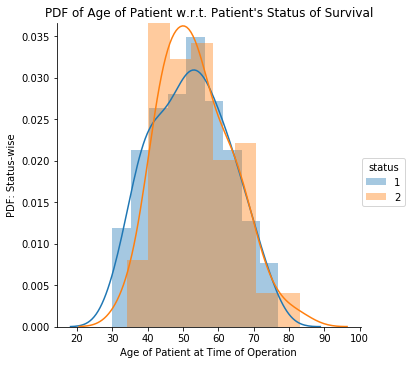

In [12]:
# PDF of Age Feature
sns.FacetGrid(haberman_data, hue = 'status', size = 5).map(sns.distplot, 'age').add_legend()
plt.ylabel('PDF: Status-wise'); plt.xlabel('Age of Patient at Time of Operation')
plt.title("PDF of Age of Patient w.r.t. Patient's Status of Survival")
plt.show()

Observation: The distributions of both labels(1 and 2) w.r.t. Age Feature are almost overlapping with one another; with approximately same mean between 50-55. So, it can be concluded that Age cannot act as a useful feature for the purpose of classification.

C:\Users\Abhinivesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


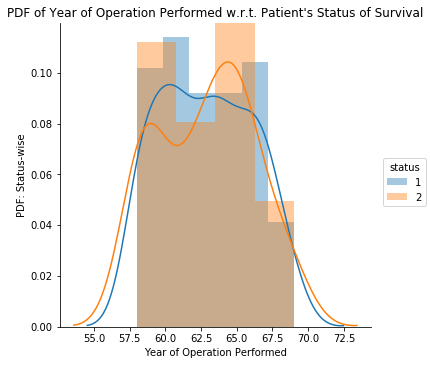

In [10]:
# PDF of Year Feature
sns.FacetGrid(haberman_data, hue = 'status', size = 5).map(sns.distplot, 'year').add_legend();
plt.ylabel('PDF: Status-wise'); plt.xlabel('Year of Operation Performed')
plt.title("PDF of Year of Operation Performed w.r.t. Patient's Status of Survival")
plt.show()

Observation: The distributions of both labels are again closely overlapping with one another w.r.t. year feature and all the data has been collected on operations performed during 1958 and 1970. There is no gap between distributions and so, it can concluded that year of operation performed also has no impact on classifying survival of the patient.

C:\Users\Abhinivesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


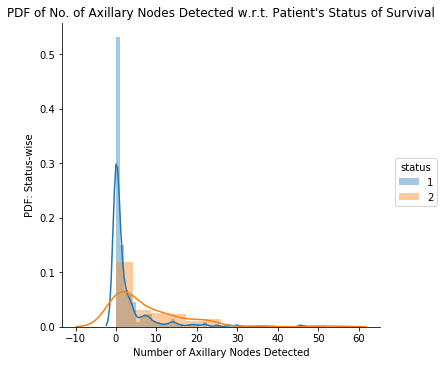

In [11]:
# PDF of Axillary Nodes
sns.FacetGrid(haberman_data, hue = 'status', size = 5).map(sns.distplot, 'nodes').add_legend();
plt.ylabel('PDF: Status-wise'); plt.xlabel('Number of Axillary Nodes Detected')
plt.title("PDF of No. of Axillary Nodes Detected w.r.t. Patient's Status of Survival")
plt.show()

Observation: Though the distributions w.r.t. axillary nodes detected are overlapping again as previous features, the spread of nodes detected for survived patients is very less compared to the deviation of non-survived patients. So, this feaure alone again can't be used to classify survival of patients.

### CDFs: Feature-wise

PDF of Age for Survived Class: 
[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]

Bin Edges of Age for Survived Class: 
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]

CDF of Age for Survived Class: 
[0.02222222 0.05333333 0.09777778 0.16       0.20444444 0.28444444
 0.32444444 0.37777778 0.47555556 0.54222222 0.61777778 0.70666667
 0.75555556 0.8        0.88       0.91111111 0.93333333 0.97333333
 0.98666667 1.        ]

PDF of Age for Not Survived Class: 
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]

Bin Edges of Age for Not Survived Class: 
[34.   36.45 38.9  41.35

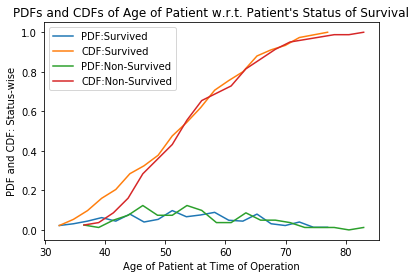

In [13]:
# Plots of CDF of Age Feature for both classes

# Survived Class

counts_s, bin_edges_s = np.histogram(haberman_survived.age, bins = 20, density = True)
pdf_s = counts_s / sum(counts_s)
cdf_s = np.cumsum(pdf_s)
print('PDF of Age for Survived Class: ')
print(pdf_s)
print()
print('Bin Edges of Age for Survived Class: ')
print(bin_edges_s)
print()
print('CDF of Age for Survived Class: ')
print(cdf_s)
print()
plt.plot(bin_edges_s[1:], pdf_s)
plt.plot(bin_edges_s[1:], cdf_s)

# Not-Survived Class

counts_ns, bin_edges_ns = np.histogram(haberman_not_survived.age, bins = 20, density = True)
pdf_ns = counts_ns / sum(counts_ns)
cdf_ns = np.cumsum(pdf_ns)
print('PDF of Age for Not Survived Class: ')
print(pdf_ns)
print()
print('Bin Edges of Age for Not Survived Class: ')
print(bin_edges_ns)
print()
print('CDF of Age for Not Survived Class: ')
print(cdf_ns)
print()
plt.plot(bin_edges_ns[1:], pdf_ns)
plt.plot(bin_edges_ns[1:], cdf_ns)

plt.legend(['PDF:Survived', 'CDF:Survived', 'PDF:Non-Survived', 'CDF:Non-Survived'])
plt.ylabel('PDF and CDF: Status-wise'); plt.xlabel('Age of Patient at Time of Operation')
plt.title("PDFs and CDFs of Age of Patient w.r.t. Patient's Status of Survival")
plt.show()

Observation: The CDFs are varying in the initial 30% of the data in both status classes and 20% of Survived patients are having age < 40 approximately whereas 20% of Non-Survived patients are having age < 45 which is slightly greater compared to Survived patients. Approximately 95% of the data points in both classes are having age < 70.  

PDF of Age for Survived Class: 
[0.10666667 0.08       0.         0.10666667 0.         0.10222222
 0.         0.07111111 0.         0.09777778 0.10222222 0.
 0.06666667 0.         0.09777778 0.         0.09333333 0.
 0.04444444 0.03111111]

Bin Edges of Age for Survived Class: 
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]

CDF of Age for Survived Class: 
[0.10666667 0.18666667 0.18666667 0.29333333 0.29333333 0.39555556
 0.39555556 0.46666667 0.46666667 0.56444444 0.66666667 0.66666667
 0.73333333 0.73333333 0.83111111 0.83111111 0.92444444 0.92444444
 0.96888889 1.        ]

PDF of Age for Not Survived Class: 
[0.14814815 0.11111111 0.         0.04938272 0.         0.03703704
 0.         0.08641975 0.         0.09876543 0.09876543 0.
 0.16049383 0.         0.07407407 0.         0.04938272 0.
 0.03703704 0.04938272]

Bin Edges of Age for Not Survived Class: 
[58.   58.55 59.1  59.65 60.2  60.75 61.3  6

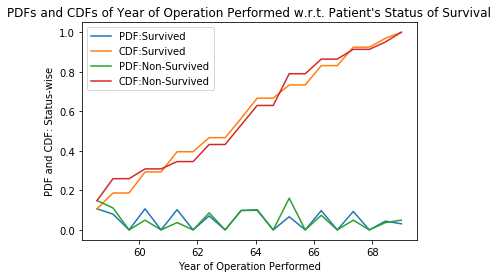

In [14]:
# Plots of CDF of Year Feature for both classes

# Survived Class

counts_s, bin_edges_s = np.histogram(haberman_survived.year, bins = 20, density = True)
pdf_s = counts_s / sum(counts_s)
cdf_s = np.cumsum(pdf_s)
print('PDF of Age for Survived Class: ')
print(pdf_s)
print()
print('Bin Edges of Age for Survived Class: ')
print(bin_edges_s)
print()
print('CDF of Age for Survived Class: ')
print(cdf_s)
print()
plt.plot(bin_edges_s[1:], pdf_s)
plt.plot(bin_edges_s[1:], cdf_s)

# Not-Survived Class

counts_ns, bin_edges_ns = np.histogram(haberman_not_survived.year, bins = 20, density = True)
pdf_ns = counts_ns / sum(counts_ns)
cdf_ns = np.cumsum(pdf_ns)
print('PDF of Age for Not Survived Class: ')
print(pdf_ns)
print()
print('Bin Edges of Age for Not Survived Class: ')
print(bin_edges_ns)
print()
print('CDF of Age for Not Survived Class: ')
print(cdf_ns)
print()
plt.plot(bin_edges_ns[1:], pdf_ns)
plt.plot(bin_edges_ns[1:], cdf_ns)

plt.legend(['PDF:Survived', 'CDF:Survived', 'PDF:Non-Survived', 'CDF:Non-Survived'])
plt.ylabel('PDF and CDF: Status-wise'); plt.xlabel('Year of Operation Performed')
plt.title("PDFs and CDFs of Year of Operation Performed w.r.t. Patient's Status of Survival")
plt.show()

Observation: The number of operations performed on both kinds of patients is almost same across all years as it is evident from the above CDFs that the curve is steadily increasing through 1958 to 1970. More than 90% of the operations are performed by the year 1968 in both the cases.

PDF of Age for Survived Class: 
[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]

Bin Edges of Age for Survived Class: 
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]

CDF of Age for Survived Class: 
[0.73333333 0.83555556 0.86222222 0.91555556 0.92888889 0.93777778
 0.96       0.96444444 0.97333333 0.98222222 0.98666667 0.98666667
 0.99111111 0.99555556 0.99555556 0.99555556 0.99555556 0.99555556
 0.99555556 1.        ]

PDF of Age for Not Survived Class: 
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]

Bin Edges of Age for Not Survived Class: 
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2

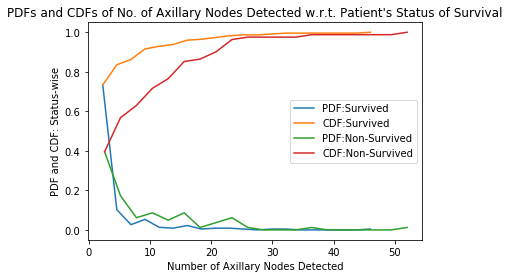

In [15]:
# Plots of CDF of Nodes Feature for both classes

# Survived Class

counts_s, bin_edges_s = np.histogram(haberman_survived.nodes, bins = 20, density = True)
pdf_s = counts_s / sum(counts_s)
cdf_s = np.cumsum(pdf_s)
print('PDF of Age for Survived Class: ')
print(pdf_s)
print()
print('Bin Edges of Age for Survived Class: ')
print(bin_edges_s)
print()
print('CDF of Age for Survived Class: ')
print(cdf_s)
print()
plt.plot(bin_edges_s[1:], pdf_s)
plt.plot(bin_edges_s[1:], cdf_s)

# Not-Survived Class

counts_ns, bin_edges_ns = np.histogram(haberman_not_survived.nodes, bins = 20, density = True)
pdf_ns = counts_ns / sum(counts_ns)
cdf_ns = np.cumsum(pdf_ns)
print('PDF of Age for Not Survived Class: ')
print(pdf_ns)
print()
print('Bin Edges of Age for Not Survived Class: ')
print(bin_edges_ns)
print()
print('CDF of Age for Not Survived Class: ')
print(cdf_ns)
print()
plt.plot(bin_edges_ns[1:], pdf_ns)
plt.plot(bin_edges_ns[1:], cdf_ns)

plt.legend(['PDF:Survived', 'CDF:Survived', 'PDF:Non-Survived', 'CDF:Non-Survived'])
plt.ylabel('PDF and CDF: Status-wise'); plt.xlabel('Number of Axillary Nodes Detected')
plt.title("PDFs and CDFs of No. of Axillary Nodes Detected w.r.t. Patient's Status of Survival")
plt.show()

Observation: More than 90% of the Survived patients have less than 10 axillary nodes detected whereas only around 70% of Non-Survived patients have less than 10 nodes detected. Around 90% of Non-Survived Class have around < 20 nodes detected.

### Box-plots: Feature-wise

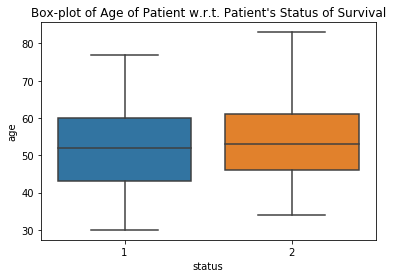

In [16]:
# Box Plot of Age of Patient w.r.t. Status
sns.boxplot(x = 'status', y = 'age', data = haberman_data)
plt.title("Box-plot of Age of Patient w.r.t. Patient's Status of Survival")
plt.show()

Observation: The IQR for Survived patients' Age is approximately 17 (60 - 43) and IQR for Non-Survived patients' Age is approximately 16 (61 - 45) which are again almost the same and particularly Q1 and Q3 values are also very close to one another.

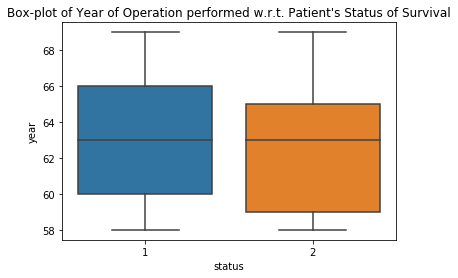

In [17]:
# Box Plot of Year of Operation performed w.r.t. Status
sns.boxplot(x = 'status', y = 'year', data = haberman_data)
plt.title("Box-plot of Year of Operation performed w.r.t. Patient's Status of Survival")
plt.show()

Observation: Similar to Age feature, Q1 for Year of Operation performed are 1960 and 1959 respectively for labels 1 and 2 and Q3 are 1966 and 1965 respectively. So, it is clear that IQR along with Median is exactly same for both the classes. So, it is not at all a useful feature in terms of classification.

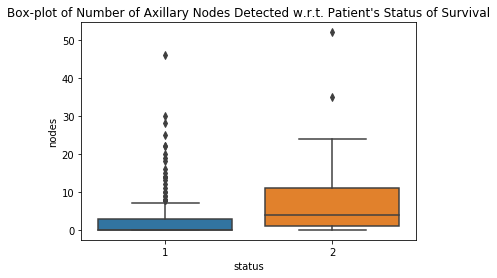

In [18]:
# Box Plot of Number of Axillary Nodes Detected w.r.t. Status
sns.boxplot(x = 'status', y = 'nodes', data = haberman_data)
plt.title("Box-plot of Number of Axillary Nodes Detected w.r.t. Patient's Status of Survival")
plt.show()

Observation: Most of the survived patients have very less number of axillary nodes detected (< 5) when compared to non-survived patients. So, there is less probability for survival of patients if there are more number of nodes present. We also can't comment when the presence of number of nodes is less.

### Violin-plots: Feature-wise

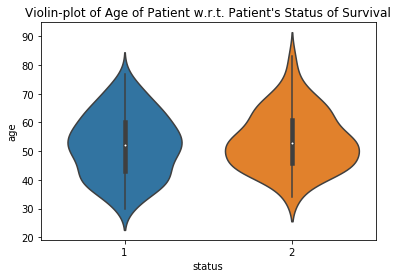

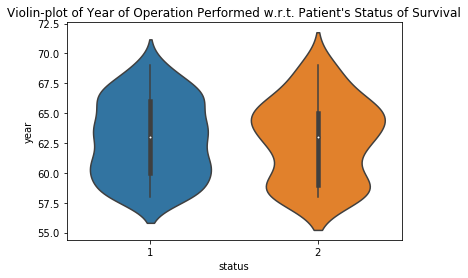

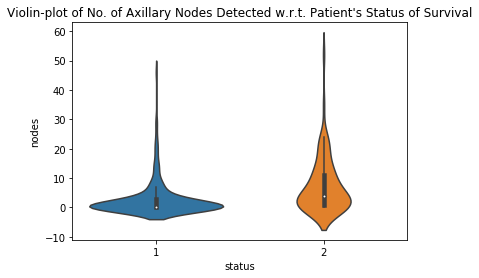

In [19]:
# Violin Plots of All Features w.r.t. Status of Patient

sns.violinplot(x = 'status', y = 'age', data = haberman_data)
plt.title("Violin-plot of Age of Patient w.r.t. Patient's Status of Survival")
plt.show()

sns.violinplot(x = 'status', y = 'year', data = haberman_data)
plt.title("Violin-plot of Year of Operation Performed w.r.t. Patient's Status of Survival")
plt.show()

sns.violinplot(x = 'status', y = 'nodes', data = haberman_data)
plt.title("Violin-plot of No. of Axillary Nodes Detected w.r.t. Patient's Status of Survival")
plt.show()

Observation: As Violin plots kind of contain both Box-plots and PDFs, there is no much extra insight as the data is completely overlapping with one another w.r.t. target variable. So, single features did not capture much relevant information to classify these two labels.

## BI-VARIATE ANALYSIS

Exploring combination of pairs of features helps in understanding whether any pair of independent variables together is useful for the purpose of classifying target variable. This can be done by plotting scatter-plots, pair-plots, etc.

### Pair-plots

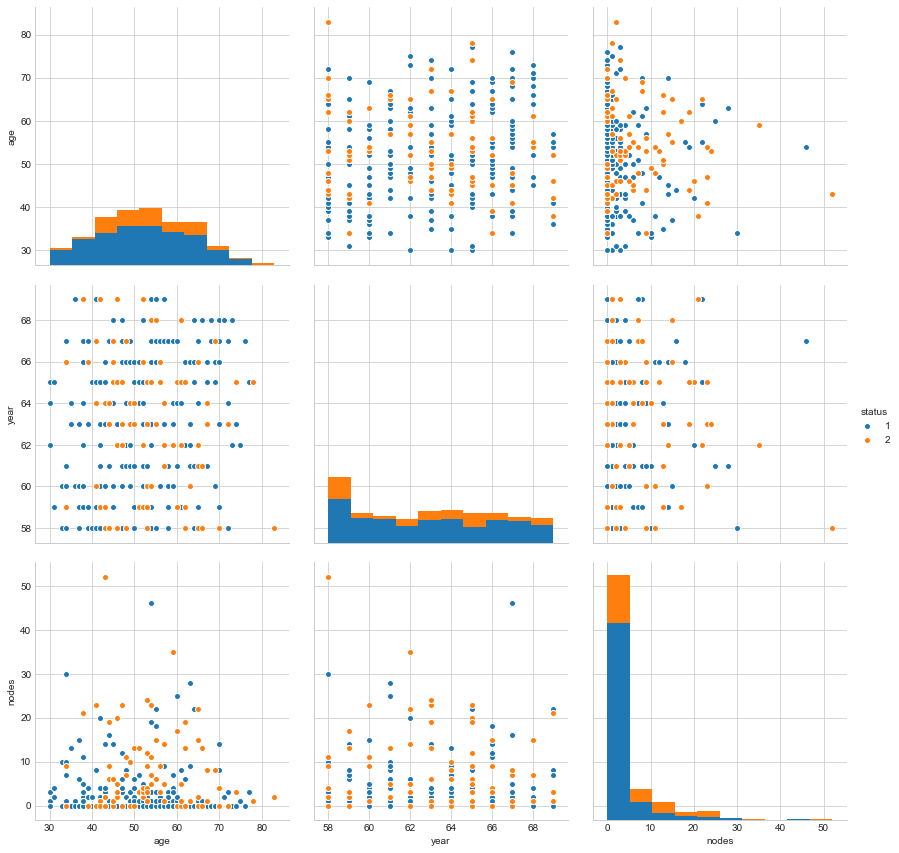

In [22]:
# Pair-Plots
sns.set_style('whitegrid')
sns.pairplot(haberman_data, hue = 'status', size = 4, vars = ['age', 'year', 'nodes'])
plt.show()

Observation: From the above pair-plots, it can be observed that there can't be a continuous curve between any pair of features that separates Survived patients from Non-Survived patients. But, there might exist discontinuous curves considering Age-Year pair and also to some extent Age-Nodes pair which can separate (not most of the data points but few of them) these two classes. 

### Conclusions: 
#### 1. No feature (1-D) is able to linearly separate these two classes solely. But, when it comes to order of relevance of information captured, we can say [Nodes > Age > Year] though the amount of information captured by each feature separately is very less. 
#### 2. Combination (2-D) of features are also not much useful for the purpose of classifying these two labels.